In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0 , X_test / 255.0
y_train, y_test = y_train.flatten() , y_test.flatten()
print("X_train.shape :", X_train.shape)
print("y_train.shape :", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
X_train.shape : (50000, 32, 32, 3)
y_train.shape : (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print('Number of classes :', K)

Number of classes : 10


In [ ]:
# Build the model using the Functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and Fit the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 13s 4ms/step - loss: 1.7407 - accuracy: 0.3609 - val_loss: 1.2691 - val_accuracy: 0.5403
Epoch 2/15
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2554 - accuracy: 0.5503 - val_loss: 1.1231 - val_accuracy: 0.5986
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0781 - accuracy: 0.6130 - val_loss: 1.0252 - val_accuracy: 0.6357
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9501 - accuracy: 0.6608 - val_loss: 1.0027 - val_accuracy: 0.6415
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8485 - accuracy: 0.7028 - val_loss: 0.9346 - val_accuracy: 0.6742
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7703 - accuracy: 0.7259 - val_loss: 0.9078 - val_accuracy: 0.6819
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6957 - accuracy: 0.7539 - val_loss: 0.8858 - val_accuracy

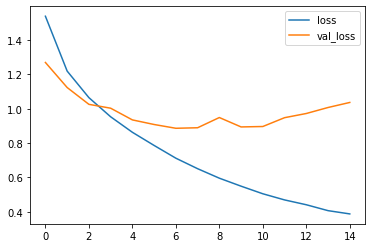

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

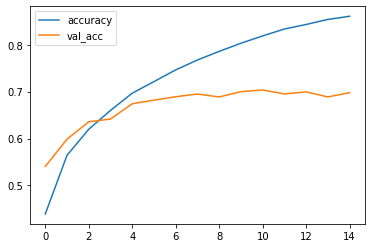

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Label mapping
labels = '''
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

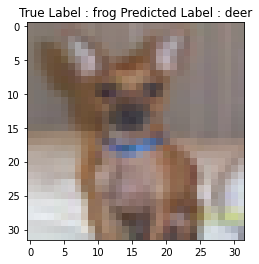

In [ ]:
p_test = model.predict(X_test).argmax(axis=1)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True Label : %s Predicted Label : %s" % (labels[y_test[i]], labels[p_test[i]]));

Confusion matrix, without normalization
[[778  18  37  17  12  14  20  16  69  19]
 [ 23 810  13   6   2  13  23   5  34  71]
 [ 61   4 562  66  85  78  99  29  12   4]
 [ 18   7  59 510  64 184 110  28  10  10]
 [ 27   4  65  71 590  56  99  77   7   4]
 [ 17   3  29 165  42 620  66  47   8   3]
 [  6   3  25  42  15  36 858   7   4   4]
 [ 20   4  37  44  46  61  14 763   3   8]
 [ 67  39  18  16  11   9  12   3 807  18]
 [ 59 132  19  19   3  17  18  24  29 680]]


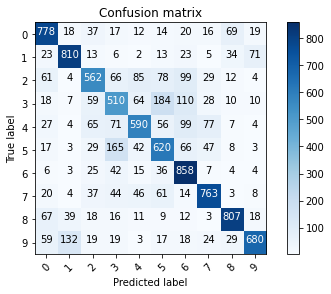

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


# p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))